# Aviso

Esse material foi desenvolvido por Igor Peretta para a disciplina _FEELT31526 Sinais e Multimídia_ (Ago/2020), a partir do material criado para [_Think DSP: Digital Signal Processing in Python_](http://greenteapress.com/thinkdsp/html/index.html), de Allen B. Downey (Copyright 2014), acessado em sua versão 1.1.2 com licença de uso [CC-BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/).

### **Pré-requisitos**

In [1]:
import os 
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('suporte/426908__dersuperanton__hello-male.wav'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula02/426908__dersuperanton__hello-male.wav -P suporte/
if not os.path.exists('suporte/janelamento.png'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula03/janelamento.png -P suporte/
if not os.path.exists('suporte/28042__bcjordan__voicedownbew.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav -P suporte/

- Arquivo `426908__dersuperanton__hello-male.wav` com formato modificado a partir do original de [dersuperanton](https://freesound.org/people/dersuperanton/sounds/426908/) sob licença de uso [CC-BY-3.0](https://creativecommons.org/licenses/by/3.0/)
- Arquivo `28042__bcjordan__voicedownbew.wav` foi originalmente retirado do site [FreeSound.org](https://freesound.org/), e após disponibilizado por Allen Downey para seu livro.

In [2]:
import thinkdsp as tdsp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [3]:
def graph_size(n):
    """Função auxiliar para definir tamanho dos gráficos"""
    return (n*(1+5**0.5)/2, n)

---

# **Aula 03a: Sinais aperiódicos**

Os sinais com os quais trabalhamos até agora são periódicos, o que significa que se repetem para sempre. Isso também significa que os componentes de frequência que eles contêm não mudam com o tempo. Vamos considerar agora os sinais não periódicos, cujos componentes de frequência efetivamente mudam com o tempo. Em outras palavras, praticamente todos os sinais de som.

## **_Chirp_ linear**

Um _chirp_ é um sinal no qual a frequência aumenta (_up-chirp_) ou diminui (_down-chirp_) com o tempo. Em algumas fontes, o termo _chirp_ é usado de forma intercambiável com o termo *sinal de varredura*. É comumente usado em sonares, radares e lasers, mas possui outras aplicações, como espalhamento espectral em comunicações.

Como exemplo, um _chirp_ começando em $A_3$ e terminando em $A_5$ ([_Scientific pitch notation_, em inglês](http://en.wikipedia.org/wiki/Scientific_pitch_notation))

In [4]:
from thinkdsp import Chirp

signal = Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)

@interact(wave=fixed(wave1), inicio=(0, 1.99, 0.01))
def mychirp(wave, inicio=0):
    plt.figure(figsize=graph_size(7))
    wave.segment(start=inicio, duration=0.01).plot()
    plt.grid('on')
    tdsp.decorate(xlabel='Tempo (s)')

interactive(children=(FloatSlider(value=0.0, description='inicio', max=1.99, step=0.01), Output()), _dom_class…

In [5]:
signal = Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)
wave1.apodize()
wave1.make_audio()

Quando você ouve esse _chirp_, podemos notar que o tom aumenta rapidamente no início e depois diminui de velocidade. O chirp abrange duas oitavas, mas leva apenas 2/3 segundos para abranger a primeira oitava e duas vezes mais tempo para abranger a segunda.

A razão é que nossa percepção do tom depende do logaritmo da frequência. Como resultado, o **intervalo** que ouvimos entre duas notas depende da proporção de suas frequências, não da diferença. "Intervalo" é o termo musical para a diferença percebida entre dois tons.

Por exemplo, uma oitava é um intervalo em que a proporção de dois tons é 2. Portanto, o intervalo de 220 Hz a 440 Hz é uma oitava e o intervalo de 440 Hz a 880 Hz também é uma oitava. A diferença de frequência é maior, mas a proporção é a mesma.

Como resultado, se a frequência aumenta linearmente, como em um chirp linear, o tom percebido aumenta logaritmicamente.

## **_Chirp_ exponencial**

Se você quiser que o tom percebido aumente linearmente, a frequência deve aumentar exponencialmente. Um sinal com essa forma é chamado de **_chirp_ exponencial**.

In [6]:
from thinkdsp import ExpoChirp

signal = ExpoChirp(start=220, end=880)
wave2 = signal.make_wave(duration=2)
wave2.apodize()
wave2.make_audio()

Se você procurar no código da classe `ExpoChirp`, você verá que em vez de `np.linspace`, essa classe usa `np.logspace` para gerar a variável indeppendente, criando assim uma série de frequências cujos logaritmos são igualmente espaçados, o que significa que aumentam exponencialmente.

## **Espectro de um _chirp_**

Se você calcular cegamente o DFT de um segmento não periódico, você obterá algo como um "borrão de movimento".

In [7]:
from thinkdsp import Chirp

@interact(inicio=(100,1000,10), final=(100,1000,10))
def linear_chirp(inicio=220, final=440):
    signal = Chirp(start=inicio, end=final)
    wave = signal.make_wave(duration=1)
    spectrum = wave.make_spectrum()
    spectrum.scale(2/len(wave))
    plt.figure(figsize=graph_size(7))
    spectrum.plot(high=1100)
    tdsp.decorate(xlabel='Frequência (Hz)')
    return wave.make_audio()

interactive(children=(IntSlider(value=220, description='inicio', max=1000, min=100, step=10), IntSlider(value=…

O espectro tem componentes em todas as frequências de 220 a 440 Hz, sendo aproximadamente plano entre esses limites, o que indica que o sinal passa o mesmo tempo em cada frequência nesta faixa. Com base nessa observação, podemos verificar a aparência do espectro de um _chirp_ exponencial.

In [8]:
from thinkdsp import ExpoChirp

@interact(inicio=(100,1000,10), final=(100,1000,10))
def expo_chirp(inicio=220, final=440):
    signal = ExpoChirp(start=inicio, end=final)
    wave = signal.make_wave(duration=1)
    spectrum = wave.make_spectrum()
    spectrum.scale(2/len(wave))
    plt.figure(figsize=graph_size(7))
    spectrum.plot(high=1100)
    tdsp.decorate(xlabel='Frequência (Hz)')
    return wave.make_audio()

interactive(children=(IntSlider(value=220, description='inicio', max=1000, min=100, step=10), IntSlider(value=…

O espectro dá dicas sobre a estrutura do sinal, mas obscurece a relação entre frequência e tempo. Por exemplo, não podemos dizer, olhando para esse espectros, se a frequência aumentou ou diminuiu, ou ambos.

---

# **Aula 03b: Espectograma**

Como visto, o espectro de um _chirp_ obscurece a relação entre frequência e tempo. Para recuperar essa relação, podemos quebrar o _chirp_ em segmentos e traçar o espectro de cada segmento. O resultado é chamado de **transformada de Fourier de curto termo** (STFT).

Existem várias maneiras de visualizar um STFT, mas a mais comum é um **espectrograma** que mostra o tempo no eixo das abscissas e a frequência no eixo das ordenadas. Cada coluna do espectrograma mostra o espectro de um segmento curto, usando cores ou tons de cinza para representar a amplitude. O módulo `thinkdsp` possui uma classe `Spectrogram` e o método `make_spectrogram` para a classe `Wave`.

In [20]:
from thinkdsp import Chirp

@interact(inicio=(100,1000,10), final=(100,1000,10))
def linear_chirp2(inicio=220, final=440):
    signal = Chirp(start=inicio, end=final)
    wave = signal.make_wave(duration=1, framerate=11025)
    spectrogram = wave.make_spectrogram(seg_length=512)
    plt.figure(figsize=graph_size(7))
    spectrogram.plot(high=1200) #, shading='auto')
    plt.grid('on')
    plt.xlabel('Tempo (s)', fontsize=14)
    plt.ylabel('Frequência (Hz)', fontsize=14)

interactive(children=(IntSlider(value=220, description='inicio', max=1000, min=100, step=10), IntSlider(value=…

Note que o número escolhido de amostras em cada segmento é de 512; isso se deve a uma limitação do algoritmo FFT que é mais eficiente quando o número de amostras é uma potência de 2.

O eixo das abscissas mostra o tempo de 0 a 1 segundos do sinal original. O eixo das ordenadas está mostrando frequências de 0 até 1200 Hz (a faixa completa do espectograma original vai para 5512,5 Hz, que é a metade da taxa de amostragem).

O espectrograma mostra claramente que a frequência aumenta linearmente com o tempo. 

In [13]:
from thinkdsp import ExpoChirp

@interact(inicio=(100,1000,10), final=(100,1000,10))
def expo_chirp2(inicio=220, final=440):
    signal = ExpoChirp(start=inicio, end=final)
    wave = signal.make_wave(duration=1)
    spectrogram = wave.make_spectrogram(seg_length=512)
    plt.figure(figsize=graph_size(7))
    spectrogram.plot(high=1200)#, shading='auto')
    plt.grid('on')
    plt.xlabel('Tempo (s)', fontsize=14)
    plt.ylabel('Frequência (Hz)', fontsize=14)

interactive(children=(IntSlider(value=220, description='inicio', max=1000, min=100, step=10), IntSlider(value=…

Da mesma forma, no espectrograma de um chirp exponencial, podemos ver a forma da curva exponencial.

No entanto, observe que o pico em cada coluna é borrado em 2–3 células. Este desfoque reflete a *resolução limitada* do espectrograma.

## **Limite de Gabor**

A **resolução de tempo** do espectrograma é igual à _duração de cada segmentos_, o que corresponde à largura das células no espectrograma. Nos exemplos apresentados cada segmento tem 512 amostras e existem 11.025 amostras por segundo. Isso significa que _a duração de cada segmento é de cerca de 0,046 segundos_.

A **resolução de frequência** é a faixa de frequência entre os elementos do espectro, que corresponde à altura das células. Com 512 amostras por segmento, obtemos 256 componentes de frequência em uma faixa de 0 a 5.512,5 Hz. Portanto, _a faixa entre cada um dos componentes é de cerca de 21,6 Hz_.

Generalizando, para o comprimento do segmento $n$ em números de amostras, seu espectro conterá $\displaystyle\frac{n}{2}$ componentes de frequência. Sendo a taxa de amostragem igual a $r$ Hz, a frequência máxima no espectro é de $\displaystyle\frac{r}{2}$ Hz. Então temos que:

- A **resolução de tempo** é de $n\cdot\displaystyle\frac{1}{r} = \displaystyle\frac{n}{r}$ segundos; e
- A **resolução de frequência** é de $\displaystyle\frac{r/2}{n/2} = \displaystyle\frac{r}{n}$ Hz.

Idealmente, gostaríamos que ambas resoluções de tempo e de frequência fossem pequenas, para que pudéssemos ver mudanças rápidas na frequência e também pequenas variações nas frequências obtidas. Mas não é possível ter o melhor dos dois mundos. Observe que a resolução de tempo $\displaystyle\frac{n}{r}$ é o inverso da resolução de frequência $\displaystyle\frac{r}{n}$. Portanto, para que um seja menor, temos que obrigatoriamente aumentar o outro.

Por exemplo, se dobrarmos o comprimento do segmento, iremos cortar a resolução da frequência pela metade (desejável), mas dobraremos a resolução do tempo (indesejável). Mesmo tentar aumentar a taxa de amostragem não ajuda. Teremos mais amostras, mas a resolução de frequência aumenta ao mesmo tempo.

Esse compromisso entre resoluções de tempo e de frequência é chamado de **limite de Gabor** e é uma limitação fundamental desse tipo de análise de tempo-frequência.

In [14]:
from thinkdsp import Chirp

@interact(pot_segmento=(5,14,1), tx_amostragem=(2000,40000,100))
def gabor(pot_segmento=9, tx_amostragem=12000):
    signal = Chirp(start=220, end=1100)
    wave = signal.make_wave(duration=1, framerate=tx_amostragem)
    spectrogram = wave.make_spectrogram(seg_length=2**pot_segmento)
    plt.figure(figsize=graph_size(7))
    spectrogram.plot(high=1200)#, shading='auto')
    plt.grid('on')
    plt.xlabel('Tempo (s)', fontsize=14)
    plt.ylabel('Frequência (Hz)', fontsize=14)
    plt.show()

interactive(children=(IntSlider(value=9, description='pot_segmento', max=14, min=5), IntSlider(value=12000, de…

## **Janelamento**

Uma das premissas da teoria de Fourier é a de que os sinais resultantes da síntese aditiva sejam _periódicos_. Uma **janela** é uma função projetada para *transformar um segmento não periódico em algo que possa se passar por periódico*. 

Considere um sinal (ou segmento de sinal) original no qual não conseguimos conectar suavemente seu final ao seu início, ou seja, um recorte não verdadeiramente periódico. Podemos ver a seguir o efeito do janelamento aplicado a esse sinal. janela utilizada é a [**janela de Hamming** (para saber mais, em inglês)](https://en.wikipedia.org/wiki/Window_function#Hann_and_Hamming_windows).

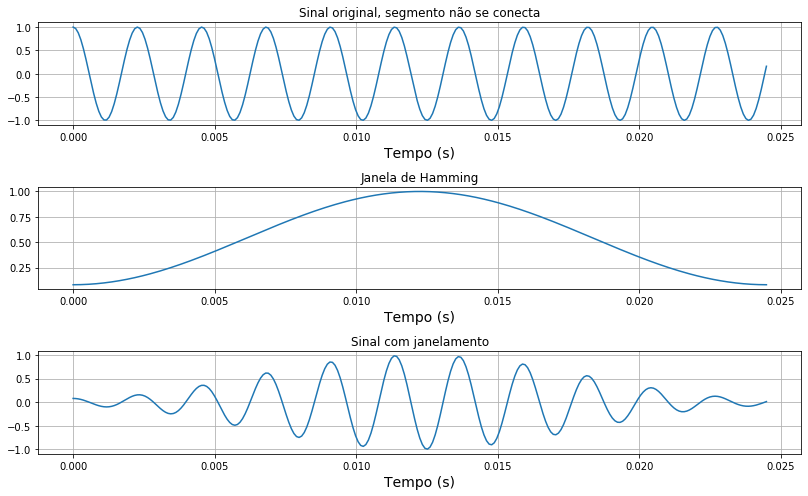

In [7]:
from thinkdsp import CosSignal

def windowing():
    signal = CosSignal(freq=440)
    duration = signal.period * 10.825
    wave = signal.make_wave(duration)
    plt.figure(figsize=graph_size(7))
    plt.subplot(311)
    wave.plot()
    plt.xlabel('Tempo (s)', fontsize=14)
    plt.title('Sinal original, segmento não se conecta')
    plt.grid('on')
    plt.subplot(312)
    hamming = np.hamming(len(wave))
    plt.plot(wave.ts, hamming)
    plt.xlabel('Tempo (s)', fontsize=14)
    plt.title('Janela de Hamming')
    plt.grid('on')
    plt.subplot(313)
    wave.window(hamming)
    wave.plot()
    plt.xlabel('Tempo (s)', fontsize=14)
    plt.title('Sinal com janelamento')
    plt.grid('on')
    plt.tight_layout()
    plt.show()
windowing()

A **janela de Hamming** é uma das funções de janela mais comuns. Nenhuma função de janela é perfeita, mas diferentes janelas podem ser consideradas ideais para diferentes aplicações. Hamming é uma boa janela de uso geral. A ideia é multiplicar a janela pelo sinal original, fazendo com que: 

- onde a janela está próxima de 1, o sinal permaneça o mesmo; 
- onde a janela está próxima de 0, o sinal é atenuado. 

Como o janelamento atenua o segmento do sinal em ambas as extremidades, o final do segmento se conecta suavemente ao início. Como curiosidade, a função janela também é conhecida em inglês como _apodization function_ ou _tapering function_.

Por conta dessa atenuação, podemos agora conectar suavemente o final do sinal ao seu início, reclamando de volta a característica de periódico necessária à aplicação da DFT para cálculo de espectro. Ainda, o janelamento reduz substancialmente (mas não completamente) um efeito conhecido como **vazamento**.

## **Vazamento espectral (_spectral leakage_)**

O vazamento espectral ocorre quando parte da energia em uma frequência aparece em outra frequência (geralmente próxima).

Vejamos o efeito do vazamento em um sinal seno (que contém apenas um componente de frequência).

In [8]:
from thinkdsp import SinSignal

@interact(fator=(29,31,0.05), janelamento=False)
def lekage(fator=30, janelamento=False):
    signal = SinSignal(freq=440)
    duration = signal.period * fator
    wave = signal.make_wave(duration)
    if janelamento:
        wave.hamming()
    spectrum = wave.make_spectrum()
    spectrum.scale(2/len(wave))
    plt.figure(figsize=graph_size(7))
    plt.subplot(211)
    wave.plot()
    plt.grid('on')
    tdsp.decorate(xlabel='Tempo (s)')
    plt.subplot(212)
    spectrum.plot(high=880)
    tdsp.decorate(xlabel='Frequência (Hz)', ylabel='Amplitude')

interactive(children=(FloatSlider(value=30.0, description='fator', max=31.0, min=29.0, step=0.05), Checkbox(va…

Observações:
- Se a duração for um *múltiplo inteiro* do período, o início e o fim do segmento se alinham e obtemos *vazamento mínimo*. 
- Se a duração *não for um múltiplo* de um período, o *vazamento é grande*. 
- A técnica conhecida como janelamento ajuda, mas observe que reduz a energia total do espectro.

## **Implementando espectogramas**

A idéia básica de um espectograma é a de apresentar a cada segmento de sinal capturado no tempo uma representação visual do seu espectro de frequência. Sendo assim, é necessário que se faça um laço que percorra o sinal original, segmentando-o, fazendo o janelamento (para minimizar o efeito de vazamento) e armazenando as amplitudes das frequências encontradas.

Para o janelamento, vamos usar a janela de Hamming, em sua forma discreta $w[n]$:

$\large w[n] = \dfrac{25}{46}\cdot\left(1 - \cos\left(\dfrac{2\pi\,n}{N}\right)\right)$

onde $n$ é o índice da amostra e $N$ é o tamanho total do sinal a ser multiplicado pela janela.

O janelamento também será considerado com um passo de $N$ amostras, com sobreposição de metade do mesmo. Na figura a seguir, temos o esquema de um janelamento sem sobreposição (acima) e com sobreposição (abaixo).

![Janelamento](suporte/janelamento.png)

Como exemplo, vamos recorrer ao sinal de "Hello" novamente. O código com detalhamentos vem a seguir:

In [9]:
from mpl_toolkits.mplot3d import Axes3D

wave = tdsp.read_wave('suporte/426908__dersuperanton__hello-male.wav')

@interact(wave=fixed(wave), fator_tamanho=(7,12,1), zoom=(1000, 20000, 1000), original=False, elev=(-90, 90, 10), azim=(0, 360,10))
def spectrogram(wave, fator_tamanho=9, zoom=20000, original=False, elev=30, azim=290):
    def hamming(N):
        n = np.array(range(N))
        return 25/46*(1 - np.cos(2*np.pi*n/N))
    def windowing(segment, window_fn):
        return segment*window_fn(len(segment))
    sr = wave.framerate
    wave.normalize() # amplitude entre -1 e 1
    wave.make_audio()
    len_segm = 2**fator_tamanho # otimização de FFT com tamanho igual a uma potência de 2
    step = len_segm//2
    spectogram_map = {}
    for n in range(0, len(wave), step):
        segment = windowing(wave.ys[n:min(n+len_segm, len(wave))], hamming)
        spectogram_map[n/sr] = (np.fft.rfftfreq(len_segm, 1./sr), np.abs(np.fft.rfft(segment))*2/len_segm) #spec_aux[:, [n]])
    plt.figure(figsize=graph_size(12))
    ax = plt.subplot(111, projection='3d')
    if original:
        ax.plot(wave.ts, np.zeros(wave.ts.shape), zs=wave.ys/2, zdir='z', color='r')
    for k, v in spectogram_map.items():
        if len(v[0]) == len(v[1]):
            ax.plot(k*np.ones(v[0].shape), v[0], zs=v[1], zdir='z', color='b')
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Frequência (Hz)", fontsize=14)
    ax.set_zlabel("Amplitude", fontsize=14)
    ax.set_ylim([0, zoom])
    ax.view_init(elev, azim)
    plt.show()
    return wave.make_audio()

interactive(children=(IntSlider(value=9, description='fator_tamanho', max=12, min=7), IntSlider(value=20000, d…

In [10]:
from mpl_toolkits.mplot3d import Axes3D

wave = tdsp.read_wave('suporte/426908__dersuperanton__hello-male.wav')

@interact(wave=fixed(wave), fator_tamanho=(7,12,1), zoom=(1000, 20000, 1000))
def spectrogram(wave, fator_tamanho=9, zoom=20000):
    plt.figure(figsize=graph_size(12))
    plt.subplot(211)
    wave.plot()
    aux = plt.xlim()
    plt.subplot(212)
    wave.make_spectrogram(seg_length=2**fator_tamanho).plot()#shading='auto')
    plt.xlim(aux)
    plt.ylim([0,zoom])

interactive(children=(IntSlider(value=9, description='fator_tamanho', max=12, min=7), IntSlider(value=20000, d…

---

# **Aula 03c: Ruído**

“Ruído” significa um som indesejado ou desagradável. No contexto de processamento de sinal, tem dois sentidos diferentes:

- Pode significar um sinal indesejado de qualquer tipo. Se dois sinais interferirem um com o outro, cada sinal consideraria o outro como ruído.

- Também pode se referir a um sinal que contém componentes em muitas frequências, por isso não tem a estrutura harmônica dos sinais periódicos que vimos nos capítulos anteriores.

Vamos falar sobre o segundo tipo.

## **Ruído não correlacionado**

A maneira mais simples de entender o ruído é gerá-lo, e o tipo mais simples de gerar é o ruído uniforme não correlacionado (ruído UNC). "Uniforme" significa que o sinal contém valores aleatórios de uma distribuição uniforme; ou seja, todos os valores no intervalo são equiprováveis. "Não correlacionado" significa que os valores são independentes entre si; ou seja, conhecer um valor não fornece informações sobre os outros.

O exemplo a seguir gera ruído UNC com duração de 0.5 segundos e 11.025 amostras por segundo. Se você ouvir essa onda, soará como a estática que você ouve se sintonizar um rádio entre os canais. A aparência da onda, quando apresentada, parece bastante aleatório como era de se esperar.

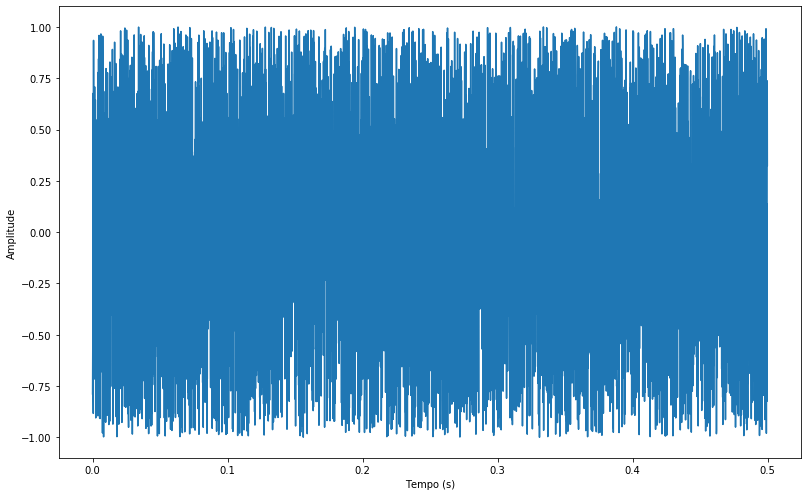

In [12]:
from thinkdsp import UncorrelatedUniformNoise

signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
plt.figure(figsize=graph_size(7))
wave.plot()
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude')
wave.make_audio()

Agora vamos dar uma olhada no espectro dessa onda:

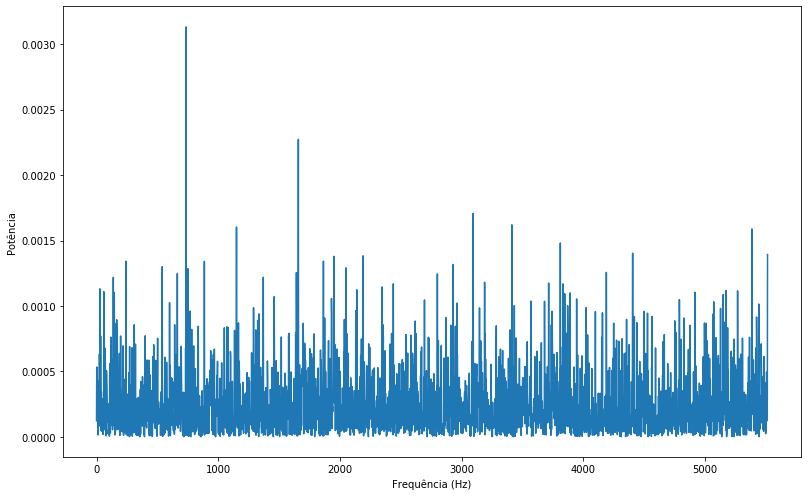

In [13]:
signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
spectrum.scale(2/len(wave))
plt.figure(figsize=graph_size(7))
spectrum.plot_power()
tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Potência")

O método `Spectrum.plot_power` é semelhante ao `Spectrum.plot`, exceto que representa a **potência** em vez da amplitude. _Potência é o quadrado da amplitude_. Estamos usando potência aqui porque é mais tradicional no contexto de ruído.

Como o próprio sinal, o espectro parece bastante aleatório. Na verdade, é aleatório, mas devemos ser mais precisos sobre aleatoriedade; existem pelo menos três características importantes de se conhecer sobre um sinal de ruído ou sobre seu espectro:

- _Distribuição_: A distribuição de um sinal aleatório é o conjunto de valores possíveis e suas probabilidades. Por exemplo, no sinal de ruído uniforme, o conjunto de valores varia de -1 a 1 e todos os valores têm a mesma probabilidade. Uma alternativa é o ruído gaussiano, onde o conjunto de valores é a faixa de infinito negativo a positivo, mas valores próximos a 0 são os mais prováveis, com probabilidade caindo de acordo com a curva gaussiana ou “sino”.

- _Correlação_: cada valor no sinal é independente dos outros ou existem dependências entre eles?

- _Relação entre potência e frequência_: No espectro de um ruído UNC, a potência em todas as frequências é obtida da mesma distribuição; ou seja, a potência média é a mesma para todas as frequências. Uma alternativa é o ruído rosa, em que a potência está inversamente relacionada à frequência; ou seja, a potência na frequência $f$ é obtida de uma distribuição cuja média é proporcional a $\dfrac{1}{f}$.

### Espectro integrado ou distribuição espectral de potência

Para o ruído UNC, podemos ver a relação entre a potência e a frequência com mais clareza, observando o **espectro integrado** ou **distribuição espectral de potência**, função da frequência $f$, que mostra a potência cumulativa no espectro.

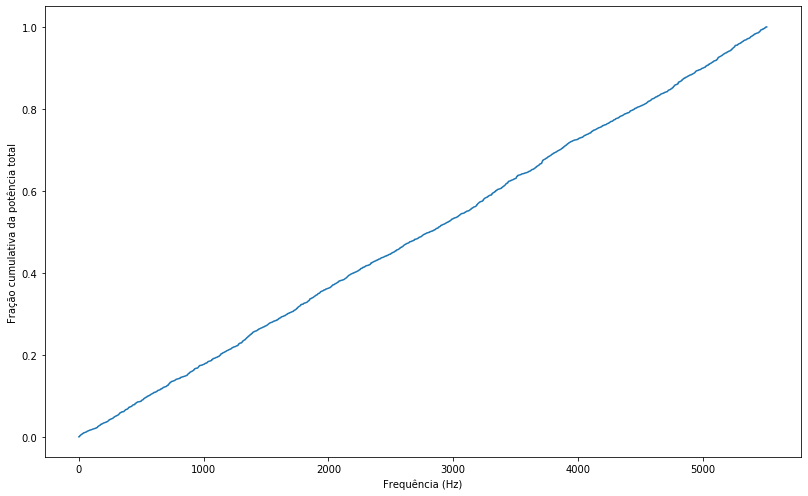

In [14]:
signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
spectrum.scale(2/len(wave))
integ = spectrum.make_integrated_spectrum() # soma integral do espectro com relacao à potencia
plt.figure(figsize=graph_size(7))
integ.plot_power()
tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Fração cumulativa da potência total")

O espectro integrado mostrado anteriormente é uma linha reta, o que indica que a potência em todas as frequências é, em média, constante. O ruído com igual potência em todas as frequências é chamado de **ruído branco** por analogia com a luz, porque uma mistura igual de luz em todas as frequências visíveis é o branco.

### Observação sobre o ruído branco

No processamento de sinal, o **ruído branco** é um sinal aleatório com intensidade igual em frequências diferentes, dando-lhe uma densidade espectral de potência constante. O termo é usado, com este ou outros significados semelhantes, em muitas disciplinas científicas e técnicas, incluindo física, engenharia acústica, telecomunicações e previsão estatística. O ruído branco se refere a um modelo estatístico para sinais e fontes de sinal, ao invés de qualquer sinal específico. 

## **Ruído browniano**

O ruído UNC não é correlacionado, o que significa que cada novo valor do sinal não depende de seus precedentes. Uma alternativa ao UNC é o **ruído browniano** em que cada valor é a soma do valor anterior e uma “etapa” aleatória. É chamado assim por analogia com o movimento browniano, frequentemente descrito como um passeio aleatório, um modelo matemático de um caminho em que a distância entre as etapas é caracterizada por uma distribuição aleatória.

O ruído browniano também é denominado **ruído vermelho**, pela mesma razão que o ruído branco é denominado “branco”. Se você combinar luz visível com potência proporcional ao inverso do quadrado da frequência, a maior parte da potência estaria na extremidade de baixa frequência do espectro, que é vermelha.

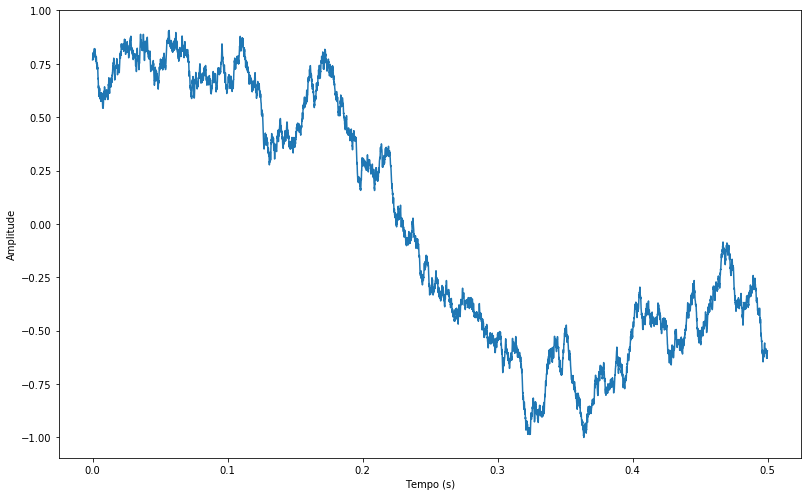

In [15]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
plt.figure(figsize=graph_size(7))
wave.plot()
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude')
wave.make_audio()

Com relação ao espectro, podemos ver que muita energia está em baixas frequências, não podemos nem mesmo ver a energia das altas frequências. Podemos obter uma visão melhor traçando o espectro de potência em uma escala log-log.

In [16]:
@interact(log_log=False)
def logspectrum(log_log):
    signal = BrownianNoise()
    wave = signal.make_wave(duration=0.5, framerate=11025)
    spectrum = wave.make_spectrum()
    spectrum.scale(2/len(wave))
    spectrum.hs[0] = 0 # evitando o extremo negativo de uma componente pequena em escala logarítmica
    plt.figure(figsize=graph_size(7))
    spectrum.plot_power()
    if log_log:
        tdsp.decorate(xlabel="log Frequência (Hz)", ylabel="log Potência", xscale='log', yscale='log')
    else:
        tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Potência")

interactive(children=(Checkbox(value=False, description='log_log'), Output()), _dom_classes=('widget-interact'…

Podemos ver em sua distribuição espectral de potência o mesmo efeito:

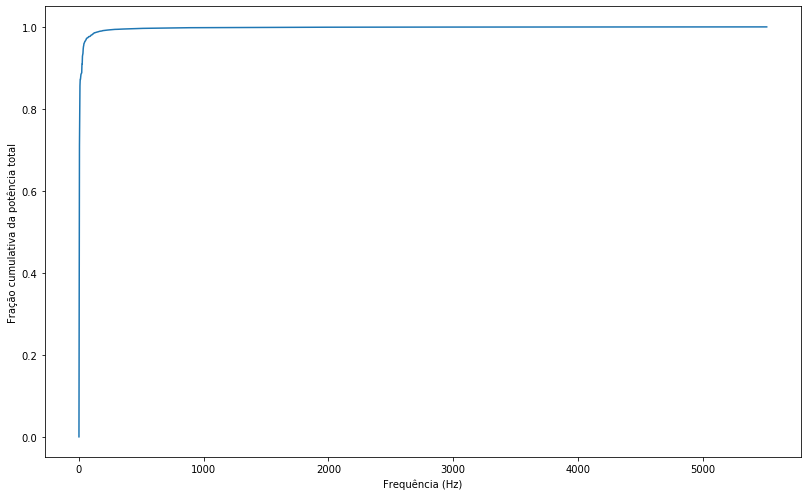

In [43]:
signal = BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
integ = spectrum.make_integrated_spectrum()
plt.figure(figsize=graph_size(7))
integ.plot_power()
tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Fração cumulativa da potência total")

## **Ruído rosa**

O chamado **ruído rosa** é caracterizado por um parâmetro $\beta$ geralmente entre 0 e 2. Com $\beta = 0$, temos o _ruído branco_, com $\beta = 2$, temos o _ruído vermelho_ (_a.k.a._ browniano). Com $\beta = 1$, a densidade espectral de potência é inversamente proporcional à frequência do sinal, sendo também conhecido como _ruído 1/f_.

In [44]:
from thinkdsp import PinkNoise

@interact(beta=(0,2,0.1))
def hear_pinknoise(beta):
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5)
    plt.figure(figsize=graph_size(7))
    wave.plot()
    tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude')
    return wave.make_audio()

interactive(children=(FloatSlider(value=1.0, description='beta', max=2.0), Output()), _dom_classes=('widget-in…

Espectro:

In [45]:
@interact(log_log=False, beta=(0,2,0.1))
def logspectrum(log_log, beta=1):
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    spectrum.scale(2/len(wave))
    spectrum.hs[0] = 0 # evitando o extremo negativo de uma componente pequena em escala logarítmica
    plt.figure(figsize=graph_size(7))
    spectrum.plot_power()
    if log_log:
        tdsp.decorate(xlabel="log Frequência (Hz)", ylabel="log Potência", xscale='log', yscale='log')
    else:
        tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Potência")

interactive(children=(Checkbox(value=False, description='log_log'), FloatSlider(value=1.0, description='beta',…

Distribuição espectral de potência:

In [46]:
@interact(beta=(0,2,0.1))
def integ_pinknoise(beta):
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    integ = spectrum.make_integrated_spectrum()
    plt.figure(figsize=graph_size(7))
    integ.plot_power()
    tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Fração cumulativa da potência total")

interactive(children=(FloatSlider(value=1.0, description='beta', max=2.0), Output()), _dom_classes=('widget-in…

Comparação de distribuição espectral de potência entre os ruídos branco, rosa e vermelho:

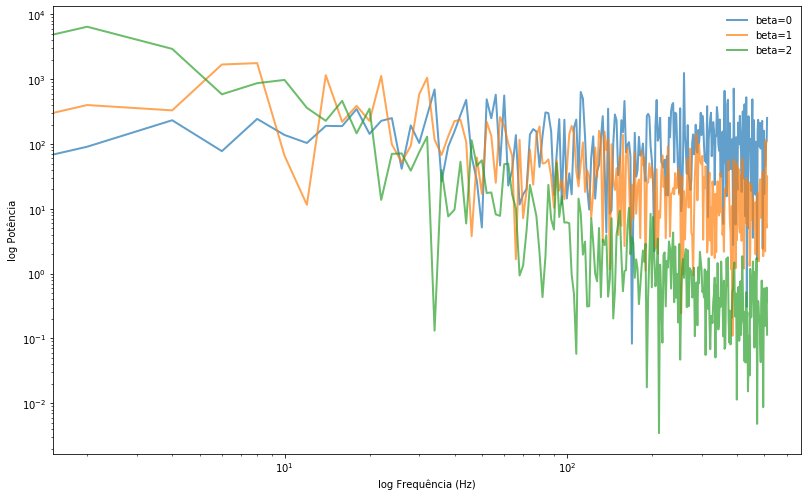

In [48]:
betas = [0, 1, 2]

plt.figure(figsize=graph_size(7))
for beta in betas:
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5, framerate=1024)
    spectrum = wave.make_spectrum()
    spectrum.hs[0] = 0
    label = f'beta={beta}'
    spectrum.plot_power(linewidth=2, alpha=0.7, label=label)
    
tdsp.decorate(xlabel='log Frequência (Hz)', ylabel='log Potência', xscale='log', yscale='log')

## **Ruído gaussiano não correlacionado**

Começamos com ruído UNC e mostramos que, por seu espectro ter potência igual em todas as frequências, em média, o ruído UNC é branco. Mas quando falamos sobre "ruído branco", nem sempre querem dizer ruído UNC. Na verdade, frequentemente nos referimos ao ruído Gaussiano não correlacionado (GNC).

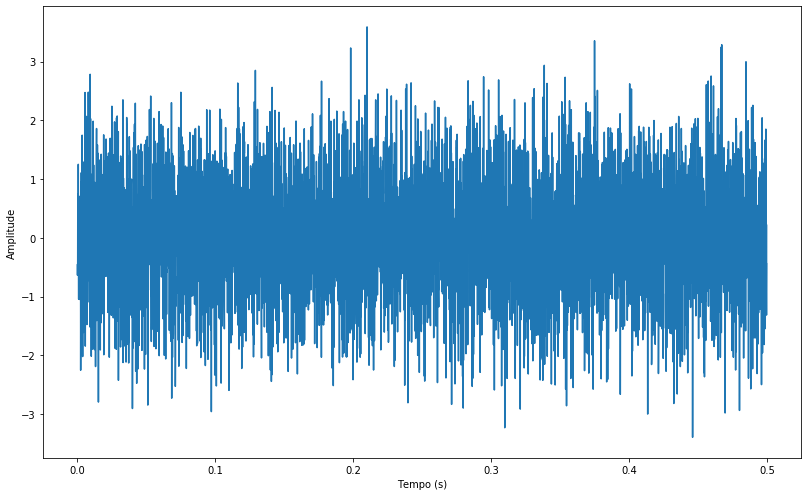

In [29]:
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5)
plt.figure(figsize=graph_size(7))
wave.plot()
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude')
wave.make_audio()

O ruído GNC é semelhante em muitos aspectos ao ruído UNC. O espectro tem potência igual em todas as frequências, em média, então GCN também é branco. Outra propriedade interessante: o espectro do ruído GNC também é ruído GNC. Mais precisamente, as partes reais e imaginárias do espectro são valores Gaussianos não correlacionados.

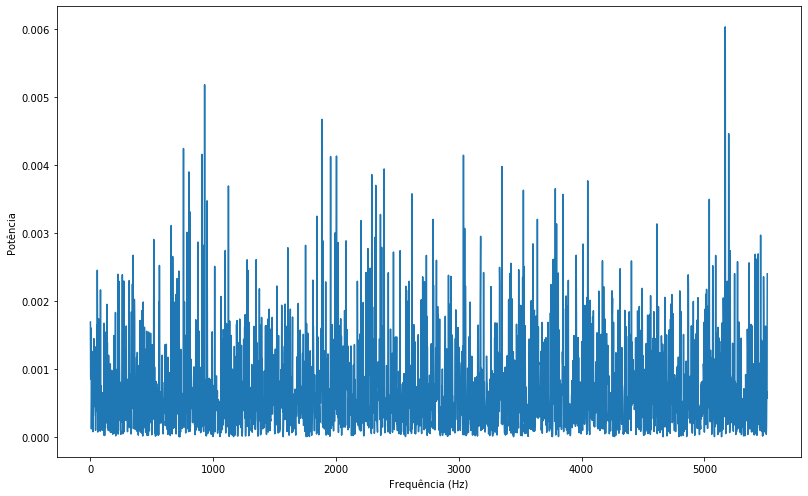

In [30]:
signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5)
spectrum = wave.make_spectrum()
spectrum.scale(2/len(wave))
plt.figure(figsize=graph_size(7))
spectrum.plot_power()
tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Potência")

Uma linha reta em um gráfico de probabilidade normal indica que os dados vêm de uma distribuição gaussiana. Exceto por alguma variação aleatória nos extremos, essas linhas são retas, o que indica que o espectro do ruído GNC é o ruído GNC.

In [31]:
def normal_prob_plot(sample, fit_color='0.8', **options):
    """Makes a normal probability plot with a fitted line.

    sample: sequence of numbers
    fit_color: color string for the fitted line
    options: passed along to Plot
    """
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.sort(sample)
    
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color='gray', alpha=0.5, label='model')

    plt.plot(xs, ys, **options)

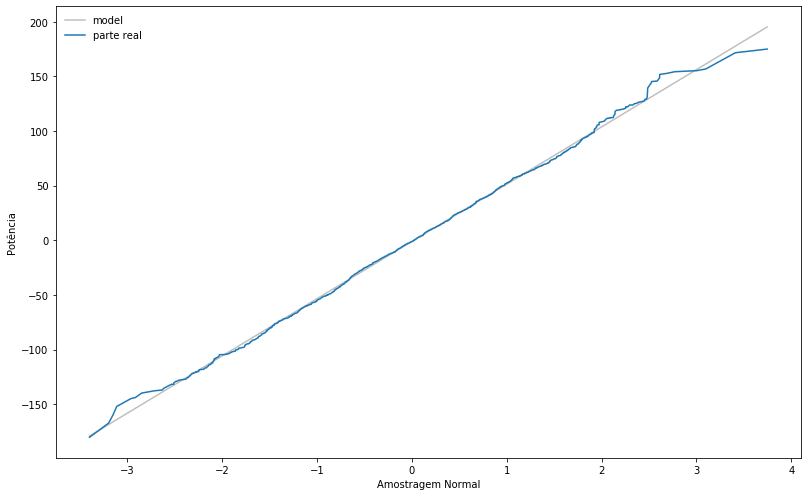

In [32]:
signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5)
spectrum = wave.make_spectrum()
plt.figure(figsize=graph_size(7))
normal_prob_plot(spectrum.real, color='C0', label='parte real')
tdsp.decorate(xlabel='Amostragem Normal', ylabel='Potência')

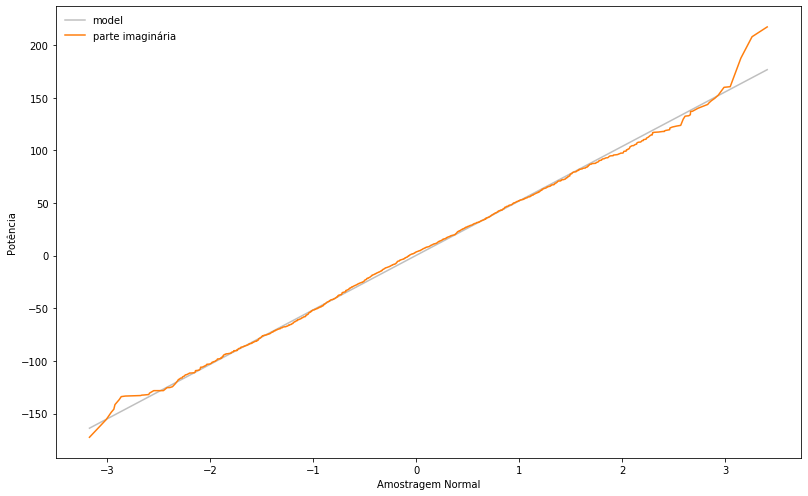

In [33]:
signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5)
spectrum = wave.make_spectrum()
plt.figure(figsize=graph_size(7))
normal_prob_plot(spectrum.imag, color='C1', label='parte imaginária')
tdsp.decorate(xlabel='Amostragem Normal', ylabel='Potência')

O espectro de ruído UNC também é ruído GNC, pelo menos aproximadamente. Na verdade, pelo [Teorema Central do Limite](https://pt.wikipedia.org/wiki/Teorema_central_do_limite), o espectro de quase qualquer ruído não correlacionado é aproximadamente gaussiano, desde que a distribuição tenha média e desvio padrão finitos, e que o número de amostras seja grande o suficiente.

---

# **Aula 03d: Correlação**

Em geral, a correlação entre variáveis significa que, se você souber o valor de uma, terá alguma informação sobre a outra. Existem várias maneiras de quantificar a correlação, mas a mais comum é o [**coeficiente de correlação de Pearson**](https://pt.wikipedia.org/wiki/Coeficiente_de_correlação_de_Pearson), geralmente denotado por $\rho$. Para duas variáveis, $x$ e $y$, em que cada uma é um vetor com $N$ valores:

$\large \rho = \dfrac{\frac{1}{N}\sum_i (x_i-\mu_x)(y_i-\mu_y)}{\sigma_x\sigma_y}$,

onde $\mu_x$ e $\mu_y$ são as médias de $x$ e $y$, respectivamente, e $\sigma_x$ e $\sigma_y$ são seus desvios-padrão.

Esse coeficiente tem um valor entre +1 e -1. Um valor de +1 é a _correlação linear positiva total_, 0 é _nenhuma correlação linear_ e -1 é a _correlação linear negativa total_.

In [34]:
@interact(offset=(-np.pi, np.pi, np.pi/10))
def correlation(offset):
    wave1 = tdsp.SinSignal(freq=440, offset=0).make_wave(duration=0.5, framerate=10000)
    wave2 = tdsp.SinSignal(freq=440, offset=offset).make_wave(duration=0.5, framerate=10000)
    corr_matrix = np.corrcoef(wave1.ys, wave2.ys)
    plt.figure(figsize=graph_size(7))
    wave1.plot(label='offset 0')
    wave2.plot(label=f'offset {offset:.2f}')
    plt.grid('on')
    tdsp.decorate(xlim=(0, 3/440))
    plt.matshow(corr_matrix, cmap='gray')
    for i in range(2):
        for j in range(2):
            plt.annotate(f'{corr_matrix[i,j]:.3f}',(i, j), color='r', fontsize=14)

interactive(children=(FloatSlider(value=0.0, description='offset', max=3.141592653589793, min=-3.1415926535897…

## **Correlação serial**

Os sinais geralmente representam medidas de quantidades que variam no tempo. Por exemplo, os sinais de som com os quais trabalhamos representam medições de voltagem (ou corrente), que correspondem às mudanças na pressão do ar que percebemos como som.

Medidas como essa quase sempre têm correlação serial, que é a correlação entre cada elemento e o próximo (ou o anterior). Para calcular a correlação serial, podemos deslocar um sinal e depois calcular a correlação da versão alterada com a original.

In [44]:
def serial_corr(wave, lag=1):
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

Podemos testar essa função com os sinais de ruído. Esperamos que o ruído unifome não seja correlacionado, com base na forma como é gerado. Analisando o ruído Gaussiano, temos:

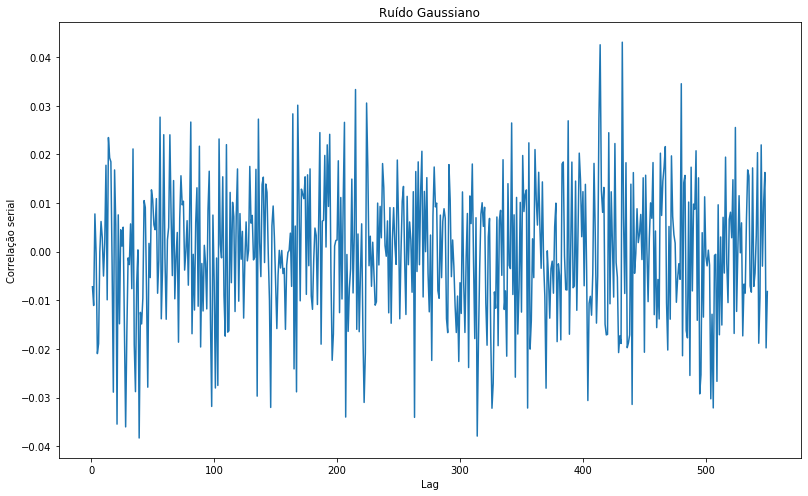

In [45]:
signal = tdsp.UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
lags = list(range(1, len(wave)//10))
scs = [0]*len(lags)
for i in lags:
    scs[i-1] = serial_corr(wave, lag=i)
plt.figure(figsize=graph_size(7))
plt.plot(lags, scs)
tdsp.decorate(xlabel='Lag', ylabel='Correlação serial', title='Ruído Gaussiano')

Em um sinal de ruído Browniano, cada valor é a soma do valor anterior e uma "etapa" aleatória, portanto, esperamos uma forte correlação serial:

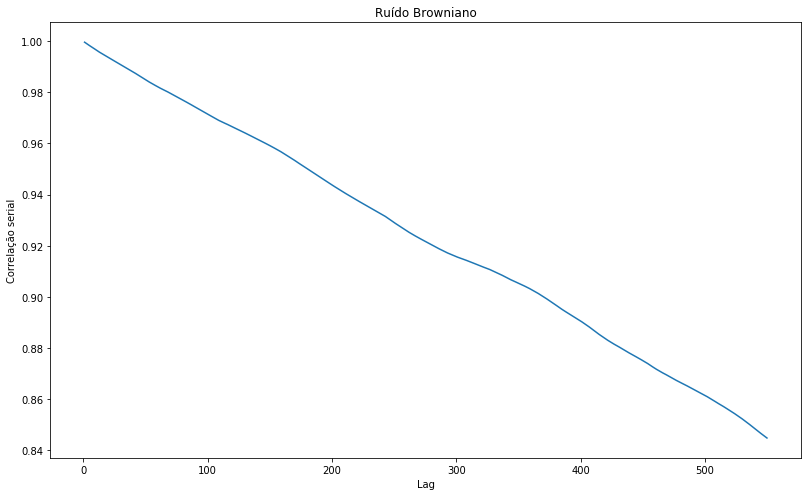

In [46]:
signal = tdsp.BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
lags = list(range(1, len(wave)//10))
scs = [0]*len(lags)
for i in lags:
    scs[i-1] = serial_corr(wave, lag=i)
plt.figure(figsize=graph_size(7))
plt.plot(lags, scs)
tdsp.decorate(xlabel='Lag', ylabel='Correlação serial', title='Ruído Browniano')

Uma vez que o ruído rosa está em certo sentido entre o ruído browniano e o ruído branco, podemos esperar uma correlação intermediária.

In [47]:
@interact(beta=(0,2,0.1))
def pink_noise(beta=1):
    signal = tdsp.PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5, framerate=11025)
    lags = list(range(1, len(wave)//10))
    scs = [0]*len(lags)
    for i in lags:
        scs[i-1] = serial_corr(wave, lag=i)
    plt.figure(figsize=graph_size(7))
    plt.plot(lags, scs)
    tdsp.decorate(xlabel='Lag', ylabel='Correlação serial', title=r'Ruído Rosa, $\beta=$' + f' {beta}')

interactive(children=(FloatSlider(value=1.0, description='beta', max=2.0), Output()), _dom_classes=('widget-in…

Com o parâmetro $\beta = 1$, obtemos uma relativamente alta correlação serial. À medida que variamos o parâmetro em direção $\beta = 0$, que é ruído não correlacionado, a $\beta = 2$, que é browniano, a correlação serial varia de 0 a quase 1.

## **Autocorrelação**

In [39]:
def autocorr(wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [40]:
wave = tdsp.read_wave('suporte/28042__bcjordan__voicedownbew.wav')
wave.make_audio()

Investigando o espectrograma desta onda, podemos ver que a frequência fundamental e alguns dos harmônicos aparecem claramente. O _chirp_ começa perto de 500 Hz e cai para cerca de 300 Hz, aproximadamente de $C_5$ a $E_4$.

In [41]:
wave = tdsp.read_wave('suporte/28042__bcjordan__voicedownbew.wav')
@interact(wave=fixed(wave), zoom=(1000,20000,1000))
def spectrogram_sound(wave, zoom=20000):
    spectogram = wave.make_spectrogram(seg_length=512)
    plt.figure(figsize=graph_size(7))
    spectogram.plot()#shading='auto')
    tdsp.decorate(xlabel='Tempo (s)', ylabel='Frequência (Hz)', ylim=[0,zoom])

interactive(children=(IntSlider(value=20000, description='zoom', max=20000, min=1000, step=1000), Output()), _…

Para estimar o _pitch_ em um determinado ponto no tempo, poderíamos usar o espectro, mas ele não provavelmente não será suficiente. Vamos analisar um pequeno segmento da onda e traçar seu espectro:

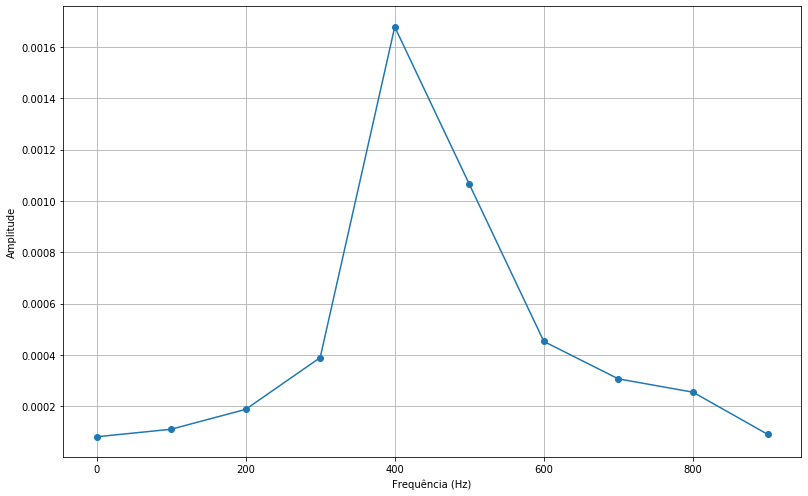

In [42]:
wave = tdsp.read_wave('suporte/28042__bcjordan__voicedownbew.wav')
duration = 0.01
segment = wave.segment(start=0.2, duration=duration)
spectrum = segment.make_spectrum()
spectrum.scale(2/len(wave))
plt.figure(figsize=graph_size(7))
spectrum.plot(high=1000, marker='o')
plt.grid('on')
tdsp.decorate(xlabel='Frequência (Hz)', ylabel='Amplitude')

Este segmento começa em 0,2 segundos e dura 0,01 segundos. Em seu espectro, há um pico claro próximo a 400 Hz, mas é difícil identificar o tom com precisão. O comprimento do segmento é de 441 amostras a uma taxa de amostragem de 44.100 Hz, portanto, a resolução da frequência é de 100 Hz. Isso significa que a afinação estimada pode estar errada em 50 Hz; em termos musicais, a faixa de 350 Hz a 450 Hz é de cerca de 5 semitons, o que é uma grande diferença.

Poderíamos obter uma resolução de frequência melhor pegando um segmento mais longo, mas, como o tom muda com o tempo, também obteríamos o "borrão de movimento", isto é, o pico se espalharia entre o passo inicial e final do segmento, como vimos anteriormente.

No entanto, podemos estimar o _pitch_ com mais precisão usando **autocorrelação**. Se um sinal for periódico, podemos esperar que a _autocorrelação aumente quando o atraso (lag) for igual ao período_.

In [43]:
wave = tdsp.read_wave('suporte/28042__bcjordan__voicedownbew.wav')
@interact(wave=fixed(wave), tempo=(0, max(wave.ts)-0.01, 0.1))
def fundamental_by_autocorrelation(wave, tempo=0.2):
    def estimate_frequency(lag, framerate):
        period = lag/framerate
        return 1/period
    duration = 0.01
    segment = wave.segment(start=tempo, duration=duration)
    spectrum = segment.make_spectrum()
    spectrum.scale(2/len(wave))
    lags, corrs = autocorr(segment)
    lag_id = np.argmax(corrs[5:-5]) + 5 # desconsiderar o lag 0 (maior correlação)
    frequency = estimate_frequency(lags[lag_id], segment.framerate)
    plt.figure(figsize=graph_size(7))
    plt.plot(lags, corrs)
    plt.scatter(lags[lag_id], corrs[lag_id], 144, color='r', marker='*', zorder=5)
    plt.annotate(f'  Frequência fundamental: {frequency:0.2f} Hz', (lags[lag_id], corrs[lag_id]), fontsize=14, color='r')
    plt.annotate(f'  Anterior: {estimate_frequency(lags[lag_id-1], segment.framerate):0.2f} Hz;' + \
        f' Posterior: {estimate_frequency(lags[lag_id+1], segment.framerate):0.2f} Hz', (0, -1), fontsize=14, color='r')
    plt.grid('on')
    tdsp.decorate(xlabel='Lag (nº amostras)', ylabel='Autocorrelação', ylim=[-1.2,1.2])

interactive(children=(FloatSlider(value=0.2, description='tempo', max=1.4180045351473922), Output()), _dom_cla…

Usando a estratégia da autocorrelação, para o segmento começando em 0,2 segundos com duração de 0,01 segundos, podemos estimar a frequência fundamental como sendo 437 Hz. Para avaliar a precisão da estimativa, podemos executar o mesmo cálculo com os lags anterior e posterior, que correspondem às frequências 441 e 432 Hz respectivamente. A precisão da frequência usando autocorrelação é inferior a 10 Hz, em comparação com 100 Hz usando o espectro. Em termos musicais, o erro esperado é de cerca de um terço de um semitom.

---
---